# ERA5 Data Visualization
Insert description later

In [1]:
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import urllib
import pandas as pd
import numpy as np
import xarray as xr
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
print("done")

In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

done


# Data

In [2]:
# Paths to the data (eventually switch to keeling path)
t2mPath = r"E:\datasets\ERA5_mon_1979-2019_T2m.nc"
precipPath = r"E:\datasets\ERA5_mon_1979-2019_total_precipitation.nc"
lccPath = r"E:\datasets\ERA5_mon_1979-2019_low_cloud_cover.nc"
tccPath = r"E:\datasets\ERA5_mon_1979-2019_total_cloud_cover.nc"
tempPath = r"E:\datasets\ERA5_mon_1979-2019_temp.nc"

# Load the data using xarray
t2mData = xr.open_dataset(t2mPath)
precipData = xr.open_dataset(precipPath)
lccData = xr.open_dataset(lccPath)
tccData = xr.open_dataset(tccPath)
tempData = xr.open_dataset(tempPath)

# Adjusting precipitation data
precipData['tp'] = precipData['tp'] * (3000.0 / 25.4)

# Geographical Extent

In [3]:
regionDict = {
    "World" : [-180, 180, -90, 90],
    "North America" : [-140, -60, 20, 45],
    "South America" : [-85, -30, -60, 20],
    "Central America" : [-120, -60, 0, 30],
    "Europe" : [-21, 60, 30, 70],
  
}
 

# Colormaps

In [4]:
# Created an inverted colormap for clouds
color_map = plt.cm.get_cmap('Blues')
reversed_color_map = color_map.reversed()

# Plotting Functions

In [6]:
def mapHelper(ax, location):
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black')
    ax.add_feature(cartopy.feature.COASTLINE, edgecolor='black')
    ax.add_feature(cartopy.feature.STATES, edgecolor='black')
    ax.add_feature(cartopy.feature.LAKES, edgecolor='black', alpha=0.01)
    ax.set_extent(regionDict[location])
    return ax

def t2mPlot(date, location):
       
    if location not in regionDict:
        print("Invalid Region")
        return;
    
    if np.datetime64(date) not in t2mData.time:
        print("Invalid Date")
        return;
    
    fig = plt.figure(figsize = (12,6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax = mapHelper(ax, location)
    m = ax.contourf(t2mData.t2m.sel(time=date).longitude, t2mData.t2m.sel(time=date).latitude, 
                    t2mData.t2m.sel(time=date), 20, cmap = 'inferno')
    plt.colorbar(m)
    ax.set_title("Temperature at 2 meters above sea level on {}".format(date))
    
    return

def precipPlot(date, location):
    
    if location not in regionDict:
        print("Invalid Region")
        return;
    
    if np.datetime64(date) not in precipData.time:
        print("Invalid Date")
        return; 
    
    fig = plt.figure(figsize = (12,6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax = mapHelper(ax, location)
    m = ax.contourf(precipData.tp.sel(time=date).longitude, precipData.tp.sel(time=date).latitude, 
                    precipData.tp.sel(time=date), 10, cmap = 'PuBu')
    plt.colorbar(m)
    ax.set_title("Total Monthly Precipitation on {}".format(date))
    
    return

def lccPlot(date, location):
    
    if location not in regionDict:
        print("Invalid Region")
        return;
    
    if np.datetime64(date) not in lccData.time:
        print("Invalid Date")
        return;   
    
    fig = plt.figure(figsize = (12,6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax = mapHelper(ax, location)
    m = ax.contourf(lccData.lcc.sel(time=date).longitude, lccData.lcc.sel(time=date).latitude, 
                    lccData.lcc.sel(time=date), 10, cmap = reversed_color_map)
    plt.colorbar(m)
    ax.set_title("Low Cloud Cover for {}".format(date))
    
    return

def tccPlot(date, location):
    
    if location not in regionDict:
        print("Invalid Region")
        return;
    
    if np.datetime64(date) not in tccData.time:
        print("Invalid Date")
        return;   
    
    fig = plt.figure(figsize = (12,6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax = mapHelper(ax, location)
    m = ax.contourf(tccData.tcc.sel(time=date).longitude, tccData.tcc.sel(time=date).latitude, 
                    tccData.tcc.sel(time=date), 10, cmap = reversed_color_map)
    plt.colorbar(m)
    ax.set_title("Total Cloud Cover for {}".format(date))
    
    return

# def tempPlot(date, level, location):

# Plotting Instructions

### Avaliable Functions
* t2mPlot(date, location) 
* precipPlot(date, location)
* lccPlot(date, location)
* tccPlot(date location)

### Upcoming Functions
* tempPlot(date, level, location)

### Date Format
* "yyyy-mm-dd"
* With the current data, dd is usually equal to '01'

### Locations
* World
* North America
* Central America
* South America
* Europe

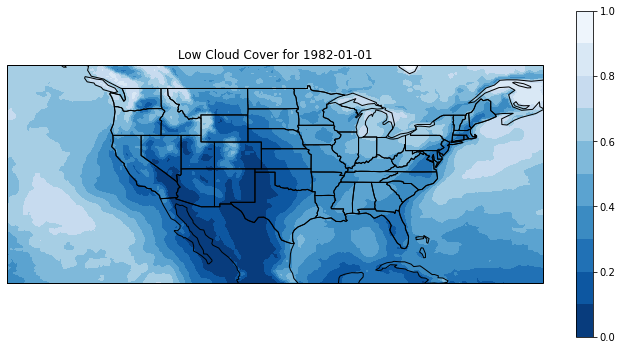

In [7]:
lccPlot("1982-01-01", "North America")

# Anomolies

In [9]:
t2mData.head()

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 5, time: 5)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 89.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 1979-05-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-08 14:51:28 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [24]:
#t2m

#plt.plot(t2mData.time, t2mData.t2m.mean)
t2mData.mean('latitude').t2m
#plt.plot(t2mData.time, )

<xarray.DataArray 't2m' (time: 492, longitude: 1440)>
array([[279.1823 , 279.17902, 279.15842, ..., 279.0782 , 279.11337,
        279.1509 ],
       [278.42282, 278.40826, 278.3706 , ..., 278.3674 , 278.3892 ,
        278.41003],
       [278.85608, 278.85083, 278.823  , ..., 278.79034, 278.81674,
        278.84134],
       ...,
       [280.07257, 280.09433, 280.09274, ..., 279.95993, 279.99402,
        280.03436],
       [279.84024, 279.84988, 279.8411 , ..., 279.74268, 279.777  ,
        279.81274],
       [280.59207, 280.59677, 280.5911 , ..., 280.4925 , 280.5264 ,
        280.5631 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01